# Python Open Labs: Visualizing data with pandas

## Setup

With this Google Colaboratory (Colab) notebook open, click the "Copy to Drive" button that appears in the menu bar. The notebook will then be attached to your own user account, so you can edit it in any way you like -- you can even take notes directly in the notebook.

## Instructors

- Walt Gurley
- Claire Cahoon

## Open Labs agenda

1. **Guided activity**: One of the instructors will share their screen to work through the guided activity and teach concepts along the way.

2. **Open lab time**: After the guided portion of the Open Lab, the rest of the time is for you to ask questions, work collaboratively, or have self-guided practice time. You will have access to instructors and peers for questions and support.

Breakout rooms will be available if you would like to work in small groups. If you have trouble joining a room, ask in the chat to be moved into a room.

## Learning objectives

By the end of our workshop today, we hope you'll understand basic methods for exploring data with pandas and the visualization library matplotlib and have an awareness of other Python visualization libraries.

## Today's Topics

- TODO

## Questions during the workshop

Please feel free to ask questions throughout the workshop.

We have a second instructor who will available during the workshop. They will answer as able, and will collect questions with answers that might help everyone to be answered at the end of the workshop.

The open lab time is when you will be able to ask more questions and work together on the exercises.

## Guided Instruction

In this Open Lab we're introducing how to use the pandas library with the visualization library matplotlib and other visualization libraries for exploring data.

In this section, we will work through examples using data from the [Museum of Modern Art (MoMA) research dataset](https://github.com/MuseumofModernArt/collection) containing records of all of the works that have been cataloged in the database of the MoMA collection.

> "The Museum’s website features 89,695 artworks from 26,494 artists. This research dataset contains 138,151 records, representing all of the works that have been accessioned into MoMA’s collection and cataloged in our database. It includes basic metadata for each work, including title, artist, date made, medium, dimensions, and date acquired by the Museum. Some of these records have incomplete information and are noted as “not Curator Approved." - [MoMA Github repository for collection data](https://github.com/MuseumofModernArt/collection)

We have prepared a dataset to use in the following activities that consists of MoMA artworks classified as paintings, artist information for each painting, and additional variables generated for exploring the dataset. We will be referencing the data that we have prepared in our [Github repository for teaching datasets](https://github.com/ncsu-libraries-data-vis/teaching-datasets/tree/main/moma_data).

In [17]:
# Import the Pandas library as pd (callable in our code as pd)
import pandas as pd

### Load the dataset

In [35]:
# Import the cleaned MoMA paintings with artist information dataset (CSV file)
# The file location
file_url = 'https://raw.githubusercontent.com/ncsu-libraries-data-vis/teaching-datasets/main/moma_data/moma_paintings_final.csv'

# Read in the file and print out the DataFrame
paintings = pd.read_csv(file_url)
paintings

,Title,Artist,ConstituentID,Date,Medium,Dimensions,CreditLine,AccessionNumber,Classification,Department,...,Duration (sec.),ArtistBio,Nationality,Gender,BeginDate,EndDate,Area (cm^2),Aspect,OilPainting,YearCreated
1,"Rope and People, I",Joan Miró,4016.0,"Barcelona, March 27, 1935","Oil on cardboard mounted on wood, with coil of...","41 1/4 x 29 3/8"" (104.8 x 74.6 cm)",Gift of the Pierre Matisse Gallery,71.1936,Painting,Painting & Sculpture,...,NaN,"Spanish, 1893–1983",Spanish,male,1893.0,1983.0,7818.080000,0.711832,Y,1935.0
2,Fire in the Evening,Paul Klee,3130.0,1929,Oil on cardboard,"13 3/8 x 13 1/4"" (33.8 x 33.3 cm)",Mr. and Mrs. Joachim Jean Aberbach Fund,153.1970,Painting,Painting & Sculpture,...,NaN,"German, born Switzerland. 1879–1940",German,male,1879.0,1940.0,1125.540000,0.985207,Y,1929.0
3,Portrait of an Equilibrist,Paul Klee,3130.0,1927,Oil and collage on cardboard over wood with pa...,"24 7/8 x 15 3/4"" (63.2 x 40 cm)",Mrs. Simon Guggenheim Fund,195.1966,Painting,Painting & Sculpture,...,NaN,"German, born Switzerland. 1879–1940",German,male,1879.0,1940.0,2219.040000,0.610282,Y,1927.0
4,Guitar,Pablo Picasso,4609.0,"Paris, early 1919","Oil, charcoal and pinned paper on canvas","7' 1"" x 31"" (216 x 78.8 cm)",Gift of A. Conger Goodyear,384.1955,Painting,Painting & Sculpture,...,NaN,"Spanish, 1881–1973",Spanish,male,1881.0,1973.0,16991.330000,0.364521,Y,1919.0
5,Grandmother,Arthur Dove,1602.0,1925,"Shingles, needlepoint, page from Concordance, ...","20 x 21 1/4"" (50.8 x 54.0 cm)",Gift of Philip L. Goodwin (by exchange),636.1939,Painting,Painting & Sculpture,...,NaN,"American, 1880–1946",American,male,1880.0,1946.0,2743.200000,1.062992,N,1925.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38098,Zacimba Gaba,Dalton Paula,132719.0,2020,"Oil, pencil, and gold leaf on two joined canvases","24 × 17 3/4"" (61 × 45.1 cm), in two parts",NaN,TR16514.1,Painting,Painting & Sculpture,...,NaN,"Brazilian, born 1982",Brazilian,NaN,1982.0,0.0,2748.392594,0.739583,Y,2020.0
38099,Zumbi,Dalton Paula,132719.0,2020,"Oil, pencil, and gold leaf on two joined canvases","24 × 17 3/4"" (61 × 45.1 cm), in two parts",NaN,TR16514.2,Painting,Painting & Sculpture,...,NaN,"Brazilian, born 1982",Brazilian,NaN,1982.0,0.0,2748.392594,0.739583,Y,2020.0
38100,Vertigo #2,Ouattara Watts,132954.0,2011,"Acrylic, paper pulp, cut and pasted fabrics, a...","118 1/4 × 165 1/2 × 3 3/4"" (300.4 × 420.4 × 9....",NaN,TR16516,Painting,Painting & Sculpture,...,NaN,"American, born Ivory Coast, 1957",American,NaN,1957.0,0.0,126260.736392,1.399577,N,2011.0
38101,Lot 111113 (flare 1),Donald Moffett,7435.0,2013,Acrylic and lacquer on linen with cotton and a...,"54 × 44"" (137.2 × 111.8 cm)",NaN,TR16517,Painting,Painting & Sculpture,...,NaN,"American, born 1955",American,male,1955.0,0.0,15329.062916,0.814815,N,2013.0


### The pandas plot method

Plotting data with pandas can be accomplished using the `plot()` method available on both `Series` and `DataFrame` objects. By default, when calling the `plot()` method pandas creates a `line` plot, assuming the data referenced for the plot is numeric.

We will explore the results of calling `plot()` on our `paintings` DataFrame and the `ObjectID` column from our DataFrame (a Series).

<AxesSubplot:>

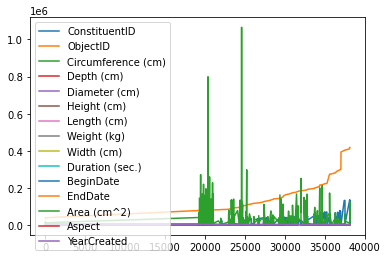

In [33]:
# Call the plot method on the entire 
paintings.plot()

<AxesSubplot:>

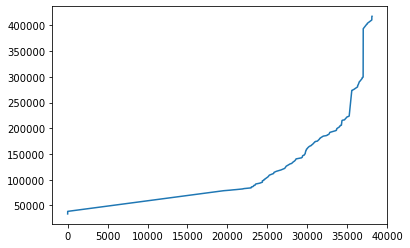

In [34]:
paintings['ObjectID'].plot()